In [1]:
from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open("data.txt", "r")
data = [int(x) for x in f.read().split()]
print(data)
data = np.sort(data)
amm = dict()
for i in data:
    if not i in amm.keys():
        amm.update({i : 1})
    else:
        amm[i] += 1
amm_m = amm.copy()
print('\n', amm_m)
for i in amm.keys():
    amm[i] /= 100
print('\n', amm)

[2, 0, 8, 0, 15, 1, 1, 1, 7, 1, 0, 0, 3, 1, 1, 1, 0, 0, 3, 1, 2, 4, 10, 6, 1, 0, 1, 0, 0, 2, 0, 1, 5, 0, 1, 9, 4, 2, 11, 3, 2, 0, 8, 1, 6, 3, 0, 1, 1, 4, 0, 9, 5, 3, 3, 0, 0, 10, 2, 0, 3, 11, 0, 9, 0, 1, 4, 1, 0, 2, 0, 1, 1, 3, 4, 7, 1, 3, 3, 0, 4, 7, 6, 0, 3, 0, 1, 15, 11, 1, 2, 4, 0, 2, 0, 0, 0, 26, 4, 0]

 {0: 29, 1: 22, 2: 9, 3: 11, 4: 8, 5: 2, 6: 3, 7: 3, 8: 2, 9: 3, 10: 2, 11: 3, 15: 2, 26: 1}

 {0: 0.29, 1: 0.22, 2: 0.09, 3: 0.11, 4: 0.08, 5: 0.02, 6: 0.03, 7: 0.03, 8: 0.02, 9: 0.03, 10: 0.02, 11: 0.03, 15: 0.02, 26: 0.01}


#### Полігон частостей реалізації виборки

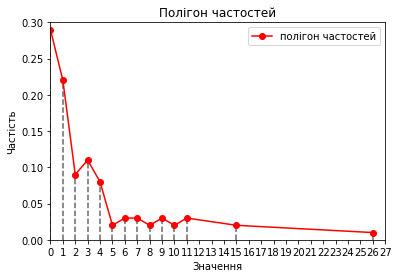

In [3]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей')
plt.ylabel('Частість')
plt.xlabel('Значення')
plt.axis([0, 27, 0.00, 0.30])
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.legend()
plt.savefig('pictures/plot.png', dpi = 300)
plt.show()

In [4]:
def geom_prob(val, p = 0.5):
    return p * ((1 - p) ** val)

Порівняння полігону частостей реалізації виборки та полігону ймовірностей:

#### 1) геометричного закону з p = 0.5

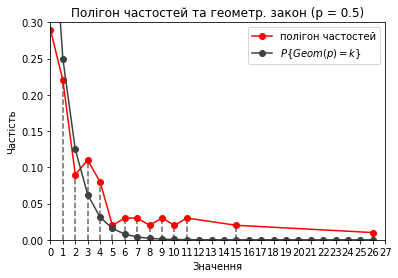

In [5]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей та геометр. закон (p = 0.5)')
plt.ylabel('Частість')
plt.xlabel('Значення')
plt.axis([0, 26, 0.00, 0.30])
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.plot([i for i in range(27)], [geom_prob(i) for i in range(27)], '-o', color = '0.25', label = r'$P\left\{Geom(p) = k\right\}$')
plt.legend()
plt.savefig('pictures/plot1.png', dpi = 300)
plt.show()

#### 2) геометричного закону з p = 0.4

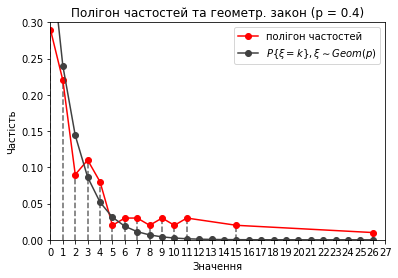

In [6]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей та геометр. закон (p = 0.4)')
plt.ylabel('Частість')
plt.xlabel('Значення')
plt.axis([0, 26, 0.00, 0.30])
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.plot([i for i in range(27)], [geom_prob(i, p = 0.4) for i in range(27)], '-o', color = '0.25', label = r'$P\left\{\xi = k\right\}, \xi \sim Geom(p)$')    
plt.legend()
plt.savefig('pictures/plot2.png', dpi = 300)
plt.show()

#### 3) геометричного закону з p = 0.3

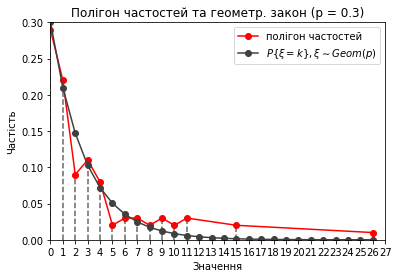

In [7]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей та геометр. закон (p = 0.3)')
plt.ylabel('Частість')
plt.xlabel('Значення')
plt.axis([0, 26, 0.00, 0.30])
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.plot([i for i in range(27)], [geom_prob(i, p = 0.3) for i in range(27)], '-o', color = '0.25', label = r'$P\left\{\xi = k\right\}, \xi \sim Geom(p)$')
plt.legend()
plt.savefig('pictures/plot3.png', dpi = 300)
plt.show()

#### 3) геометричного закону з p = 0.2

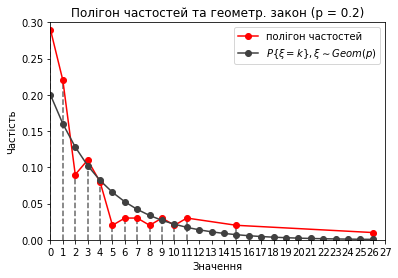

In [8]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей та геометр. закон (p = 0.2)')
plt.ylabel('Частість')
plt.axis([0, 26, 0.00, 0.30])
plt.xlabel('Значення')
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.plot([i for i in range(27)], [geom_prob(i, p = 0.2) for i in range(27)], '-o', color = '0.25', label = r'$P\left\{\xi = k\right\}, \xi \sim Geom(p)$')
plt.legend()
plt.savefig('pictures/plot4.png', dpi = 300)
plt.show()

Знайдемо емпіричну функцію розподілу.

In [9]:
def empiric_distribution(x):
    if x <= 0:
        return 0
    elif 0 < x <= 1:
        return 0.29
    elif 1 < x <= 2:
        return 0.51
    elif 2 < x <= 3:
        return 0.60
    elif 3 < x <= 4:
        return 0.71
    elif 4 < x <= 5:
        return 0.79
    elif 5 < x <= 6:
        return 0.81
    elif 6 < x <= 7:
        return 0.84
    elif 7 < x <= 8:
        return 0.87
    elif 8 < x <= 9:
        return 0.89
    elif 9 < x <= 10:
        return 0.92
    elif 10 < x <= 11:
        return 0.94
    elif 11 < x <= 15:
        return 0.97
    elif 15 < x <= 26:
        return 0.99
    else:
        return 1

Емпірична функція розподілу

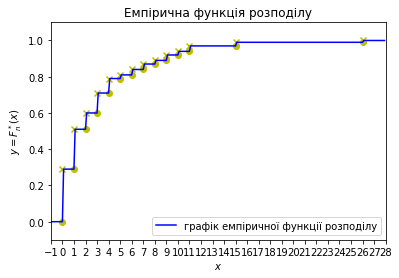

In [10]:
t2 = np.arange(-1, 28, 0.1)
plt.plot(t2, np.array([empiric_distribution(i) for i in t2]), color = 'b', label = 'графік емпіричної функції розподілу')

plt.title('Емпірична функція розподілу')
plt.ylabel('$y = F_n^*(x)$')
plt.xlabel('$x$')
plt.xticks([i for i in range(-1, 29)])
# points of continuity
con = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 26]
plt.scatter(con, [empiric_distribution(i + 0.0001) for i in con], color = 'y', marker = 'x')
# points of noncontinuity
plt.scatter(con, [empiric_distribution(i - 0.0001) for i in con], color = 'y')
plt.axis([-1, 28, -0.1, 1.1])
#final settings
plt.legend()
plt.savefig('pictures/func.png', dpi = 300)
plt.show()

Емпірична функція розподілу + геометричний закон( p = 0.4 )

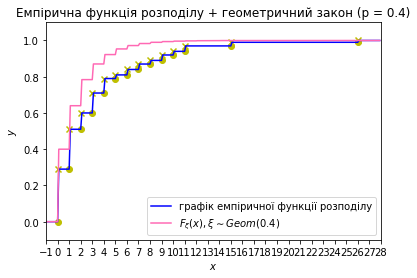

In [11]:
t1 = np.arange(0.0, 26.0, 0.001)
t2 = np.arange(-1, 28, 0.1)
plt.plot(t2, np.array([empiric_distribution(i) for i in t2]), color = 'b', label = 'графік емпіричної функції розподілу')
plt.plot(t2, np.array([geom.cdf(i + 1, 0.4) for i in t2]), color = 'hotpink', label = r'$F_{\xi}(x), \xi \sim Geom(0.4)$')
plt.title('Емпірична функція розподілу + геометричний закон (p = 0.4)')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xticks([i for i in range(-1, 29)])
# points of continuity
con = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 26]
plt.scatter(con, [empiric_distribution(i + 0.0001) for i in con], color = 'y', marker = 'x')
# points of noncontinuity
plt.scatter(con, [empiric_distribution(i - 0.0001) for i in con], color = 'y')
plt.axis([-1, 28, -0.1, 1.1])
#final settings
plt.legend()
plt.savefig('pictures/func+geom4.png', dpi = 300)
plt.show()

Емпірична функція розподілу + геометричний закон( p = 0.3 )

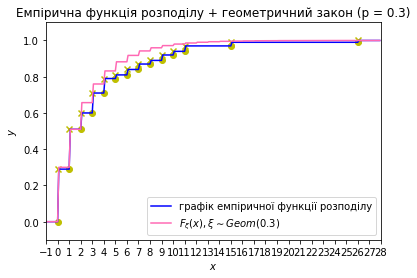

In [12]:
t1 = np.arange(0.0, 26.0, 0.001)
t2 = np.arange(-1, 28, 0.1)
plt.plot(t2, np.array([empiric_distribution(i) for i in t2]), color = 'b', label = 'графік емпіричної функції розподілу')
plt.plot(t2, np.array([geom.cdf(i + 1, 0.3) for i in t2]), color = 'hotpink', label = r'$F_{\xi}(x), \xi \sim Geom(0.3)$')
plt.title('Емпірична функція розподілу + геометричний закон (p = 0.3)')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xticks([i for i in range(-1, 29)])
# points of continuity
con = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 26]
plt.scatter(con, [empiric_distribution(i + 0.0001) for i in con], color = 'y', marker = 'x')
# points of noncontinuity
plt.scatter(con, [empiric_distribution(i - 0.0001) for i in con], color = 'y')
plt.axis([-1, 28, -0.1, 1.1])
#final settings
plt.legend()
plt.savefig('pictures/func+geom3.png', dpi = 300)
plt.show()

Емпірична функція розподілу + геометричний закон( p = 0.2 )

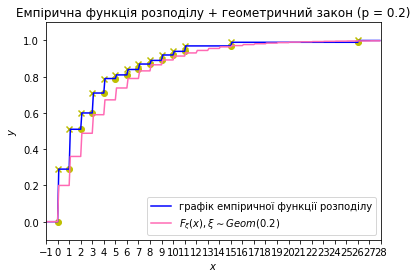

In [13]:
t1 = np.arange(0.0, 26.0, 0.001)
t2 = np.arange(-1, 28, 0.1)
plt.plot(t2, np.array([empiric_distribution(i) for i in t2]), color = 'b', label = 'графік емпіричної функції розподілу')
plt.plot(t2, np.array([geom.cdf(i + 1, 0.2) for i in t2]), color = 'hotpink', label = r'$F_{\xi}(x), \xi \sim Geom(0.2)$')
plt.title('Емпірична функція розподілу + геометричний закон (p = 0.2)')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xticks([i for i in range(-1, 29)])
# points of continuity
con = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 26]
plt.scatter(con, [empiric_distribution(i + 0.0001) for i in con], color = 'y', marker = 'x')
# points of noncontinuity
plt.scatter(con, [empiric_distribution(i - 0.0001) for i in con], color = 'y')
plt.axis([-1, 28, -0.1, 1.1])
#final settings
plt.legend()
plt.savefig('pictures/func+geom2.png', dpi = 300)
plt.show()

Знайдемо вибіркове середнє та вибіркову дисперсію, вибіркову ассиметрію:

In [14]:
Exi = 0
for i in amm_m.keys():
    Exi += i * amm_m[i]
Exi /= 100
print('Exi = ', Exi)

Exi =  3.06


In [15]:
Dxi = 0
for i in data:
    Dxi += (i - Exi)**2
Dxi /= 100
print('Dxi = ', Dxi + 1)

Dxi =  18.136400000000002


In [16]:
Asxi = 0
for i in data:
    Asxi += (i - Exi)**3
Asxi /= 100 * (Dxi)**(3/2)
print('Asxi = ', Asxi)

Asxi =  2.504088773053977
